Na kolejnych zajęciach należało rozwiązać problem liniowy dotyczący układania grafiku. Mianowicie mając wiedze kto ma jakie stawki oraz w jakie dni może pracować należało stworzyć program, który ułoży tak grafik aby zminimalizować koszty zatrudnienia pracowników.

Główna funkcja to suma kosztów zatrudnienia wszystkich pracowników

Zmiennymi decyzyjnymi w tym przypadku są obecności danego pracownika w dany dzień tygodnia.

Ograniczenia są takie, że kazdy pracownik może pracować maksymalnie 3 dni w tygodniu, pracownicy mają podane dni w jakie mogą pracować oraz ilość pracowników potrzebnych danego dnia.

Dane:

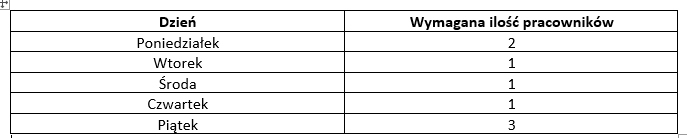

Kto może w jaki dzień pracować:

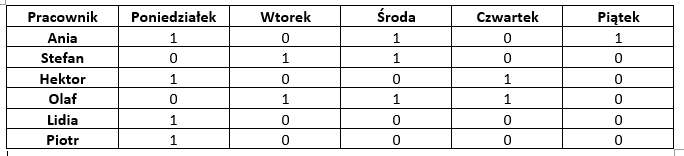

Zarobki:

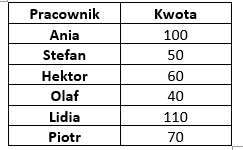





Standardowa instalacja pulpa

In [ ]:

!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

In [17]:
from pulp import *
import numpy as np

# Name and type of problem
prob = LpProblem("Optymalizacja_grafiku",LpMinimize)

# Boolean variables for five days in week for each of six workers
A1 = LpVariable("Ania_poniedzialek", 0, 1, LpInteger)
A2 = LpVariable("Ania_wtorek", 0, 1, LpInteger)
A3 = LpVariable("Ania_sroda", 0, 1, LpInteger)
A4 = LpVariable("Ania_czwartek", 0, 1, LpInteger)
A5 = LpVariable("Ania_piatek", 0, 1, LpInteger)
S1 = LpVariable("Stefan_poniedzialek", 0, 1, LpInteger)
S2 = LpVariable("Stefan_wtorek", 0, 1, LpInteger)
S3 = LpVariable("Stefan_sroda", 0, 1, LpInteger)
S4 = LpVariable("Stefan_czwartek", 0, 1, LpInteger)
S5 = LpVariable("Stefan_piatek", 0, 1, LpInteger)
H1 = LpVariable("Hektor_poniedzialek", 0, 1, LpInteger)
H2 = LpVariable("Hektor_wtorek", 0, 1, LpInteger)
H3 = LpVariable("Hektor_sroda", 0, 1, LpInteger)
H4 = LpVariable("Hektor_czwartek", 0, 1, LpInteger)
H5 = LpVariable("Hektor_piatek", 0, 1, LpInteger)
O1 = LpVariable("Olaf_poniedzialek", 0, 1, LpInteger)
O2 = LpVariable("Olaf_wtorek", 0, 1, LpInteger)
O3 = LpVariable("Olaf_sroda", 0, 1, LpInteger)
O4 = LpVariable("Olaf_czwartek", 0, 1, LpInteger)
O5 = LpVariable("Olaf_piatek", 0, 1, LpInteger)
L1 = LpVariable("Lidia_poniedzialek", 0, 1, LpInteger)
L2 = LpVariable("Lidia_wtorek", 0, 1, LpInteger)
L3 = LpVariable("Lidia_sroda", 0, 1, LpInteger)
L4 = LpVariable("Lidia_czwartek", 0, 1, LpInteger)
L5 = LpVariable("Lidia_piatek", 0, 1, LpInteger)
P1 = LpVariable("Piotr_poniedzialek", 0, 1, LpInteger)
P2 = LpVariable("Piotr_wtorek", 0, 1, LpInteger)
P3 = LpVariable("Piotr_sroda", 0, 1, LpInteger)
P4 = LpVariable("Piotr_czwartek", 0, 1, LpInteger)
P5 = LpVariable("Piotr_piatek", 0, 1, LpInteger)

# Daily cost every employes
Ac = 100
Sc = 50
Hc = 60
Oc = 40
Lc = 110
Pc = 70

# The main function for sum of each worker wage
prob += (A1+A2+A3+A4+A5) * Ac + (S1+S2+S3+S4+S5) * Sc + (H1+H2+H3+H4+H5) * Hc + (O1+O2+O3+O4+O5) * Oc + (L1+L2+L3+L4+L5) * Lc + (P1+P2+P3+P4+P5) * Pc, "min_cost"

### Constraints
# None of the employees may work more than 3 days a week
prob += A1+A2+A3+A4+A5 <= 3, "1" 
prob += S1+S2+S3+S4+S5 <= 3, "2" 
prob += H1+H2+H3+H4+H5 <= 3, "3" 
prob += O1+O2+O3+O4+O5 <= 3, "4"
prob += L1+L2+L3+L4+L5 <= 3, "5"
prob += P1+P2+P3+P4+P5 <= 3, "6"

# Days when a worker doesn't work
prob += S2+S3+S4+S5 == 0 , "7"
prob += H4+H5 == 0, "8"
prob += L1+L2+L3 == 0, "9"
prob += P4+P5 == 0, "10"

# The necessary number of employees in the store each day
prob += A1+S1+H1+O1+L1+P1 == 2, "Poniedzialek"
prob += A2+S2+H2+O2+L2+P2 == 1, "Wtorek"
prob += A3+S3+H3+O3+L3+P3 == 1, "Sroda"
prob += A4+S4+H4+O4+L4+P4 == 1, "Czwartek"
prob += A5+S5+H5+O5+L5+P5 == 3, "Piatek"


# The solution of problem
prob.solve()
print("Status:", LpStatus[prob.status], "\n")

print("Minimalne koszty:", value(prob.objective), "zl\n") 

for v in prob.variables():
    print(v.name, "=", v.varValue)

Status: Optimal 

Minimalne koszty: 500.0 zl

Ania_czwartek = 0.0
Ania_piatek = 1.0
Ania_poniedzialek = 0.0
Ania_sroda = 0.0
Ania_wtorek = 0.0
Hektor_czwartek = 0.0
Hektor_piatek = 0.0
Hektor_poniedzialek = 1.0
Hektor_sroda = 1.0
Hektor_wtorek = 0.0
Lidia_czwartek = 0.0
Lidia_piatek = 1.0
Lidia_poniedzialek = 0.0
Lidia_sroda = 0.0
Lidia_wtorek = 0.0
Olaf_czwartek = 1.0
Olaf_piatek = 1.0
Olaf_poniedzialek = 0.0
Olaf_sroda = 0.0
Olaf_wtorek = 1.0
Piotr_czwartek = 0.0
Piotr_piatek = 0.0
Piotr_poniedzialek = 0.0
Piotr_sroda = 0.0
Piotr_wtorek = 0.0
Stefan_czwartek = 0.0
Stefan_piatek = 0.0
Stefan_poniedzialek = 1.0
Stefan_sroda = 0.0
Stefan_wtorek = 0.0
